<a href="https://colab.research.google.com/github/IvanStukalov/MLTechnologies/blob/research/%D0%9D%D0%98%D0%A0%D0%A1_%D0%A2%D0%9C%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# НИРС по дисциплине "Технологии Машинного обучения"

## ИУ5-64Б Стукалов Иван

В качестве набора данных мы будем использовать набор данных Mushroom dataset для решения задачи классификации - относится ли гриб к сьедобным или же к ядовитым на основе параметров гриба.

За съедобность гриба отвечает признак class, где 0 - съедобный гриб, а 1 - ядовитый

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score, f1_score, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline
sns.set(style="ticks")

Загрузим файлы датасета в помощью библиотеки Pandas.

Данные загружены в формате csv

In [116]:
df=pd.read_csv("/content/mushroom_cleaned.csv")


In [117]:
# Удалим дубликаты записей, если они присутствуют
df = df.drop_duplicates()

### Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

#### Основные характеристики датасета:

In [118]:
df.head()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10480 entries, 0 to 10480
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     10480 non-null  int64  
 1   cap-shape        10480 non-null  int64  
 2   gill-attachment  10480 non-null  int64  
 3   gill-color       10480 non-null  int64  
 4   stem-height      10480 non-null  float64
 5   stem-width       10480 non-null  int64  
 6   stem-color       10480 non-null  int64  
 7   season           10480 non-null  float64
 8   class            10480 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 818.8 KB


In [120]:
df.shape

(10480, 9)

In [121]:
# Проверим наличие пустых значений
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Исходный датасет уже обработан от пропусков, так что заполнять их или обрабатывать каким-либо образом не нужно

In [122]:
# Список колонок
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

#### Построение графиков для датасета

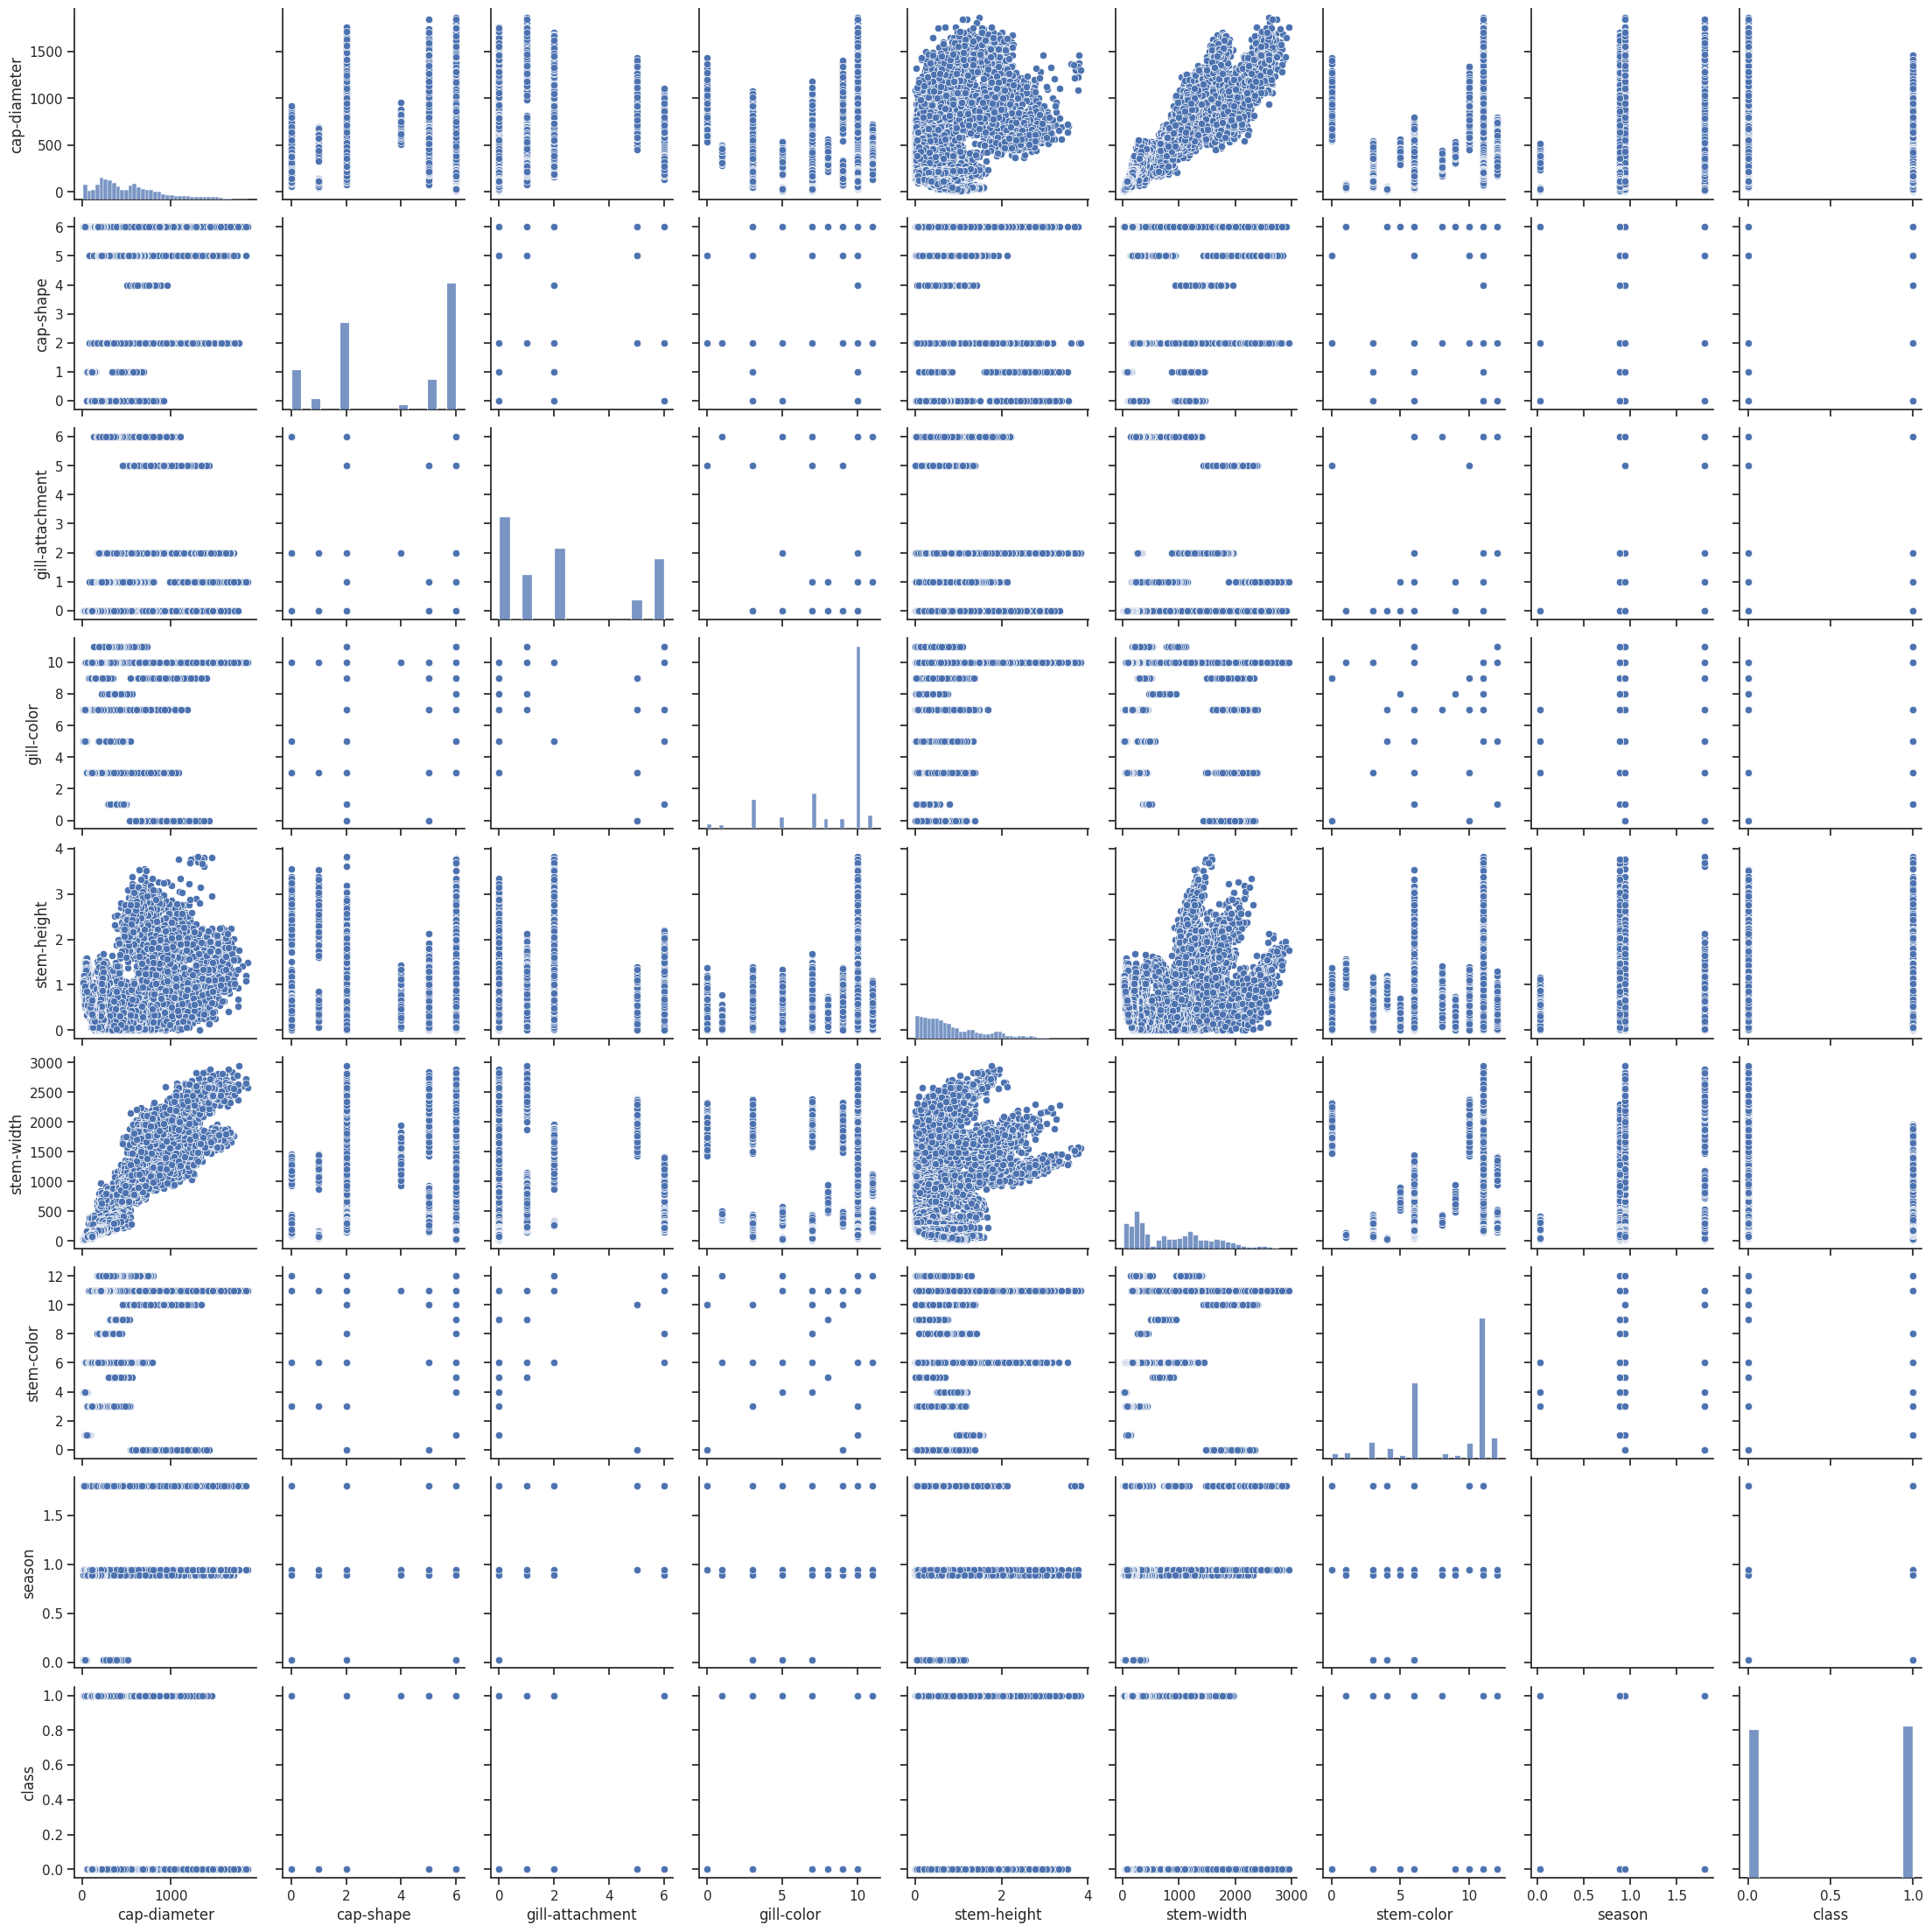

In [123]:
# Парные диаграммы
sns.pairplot(df)

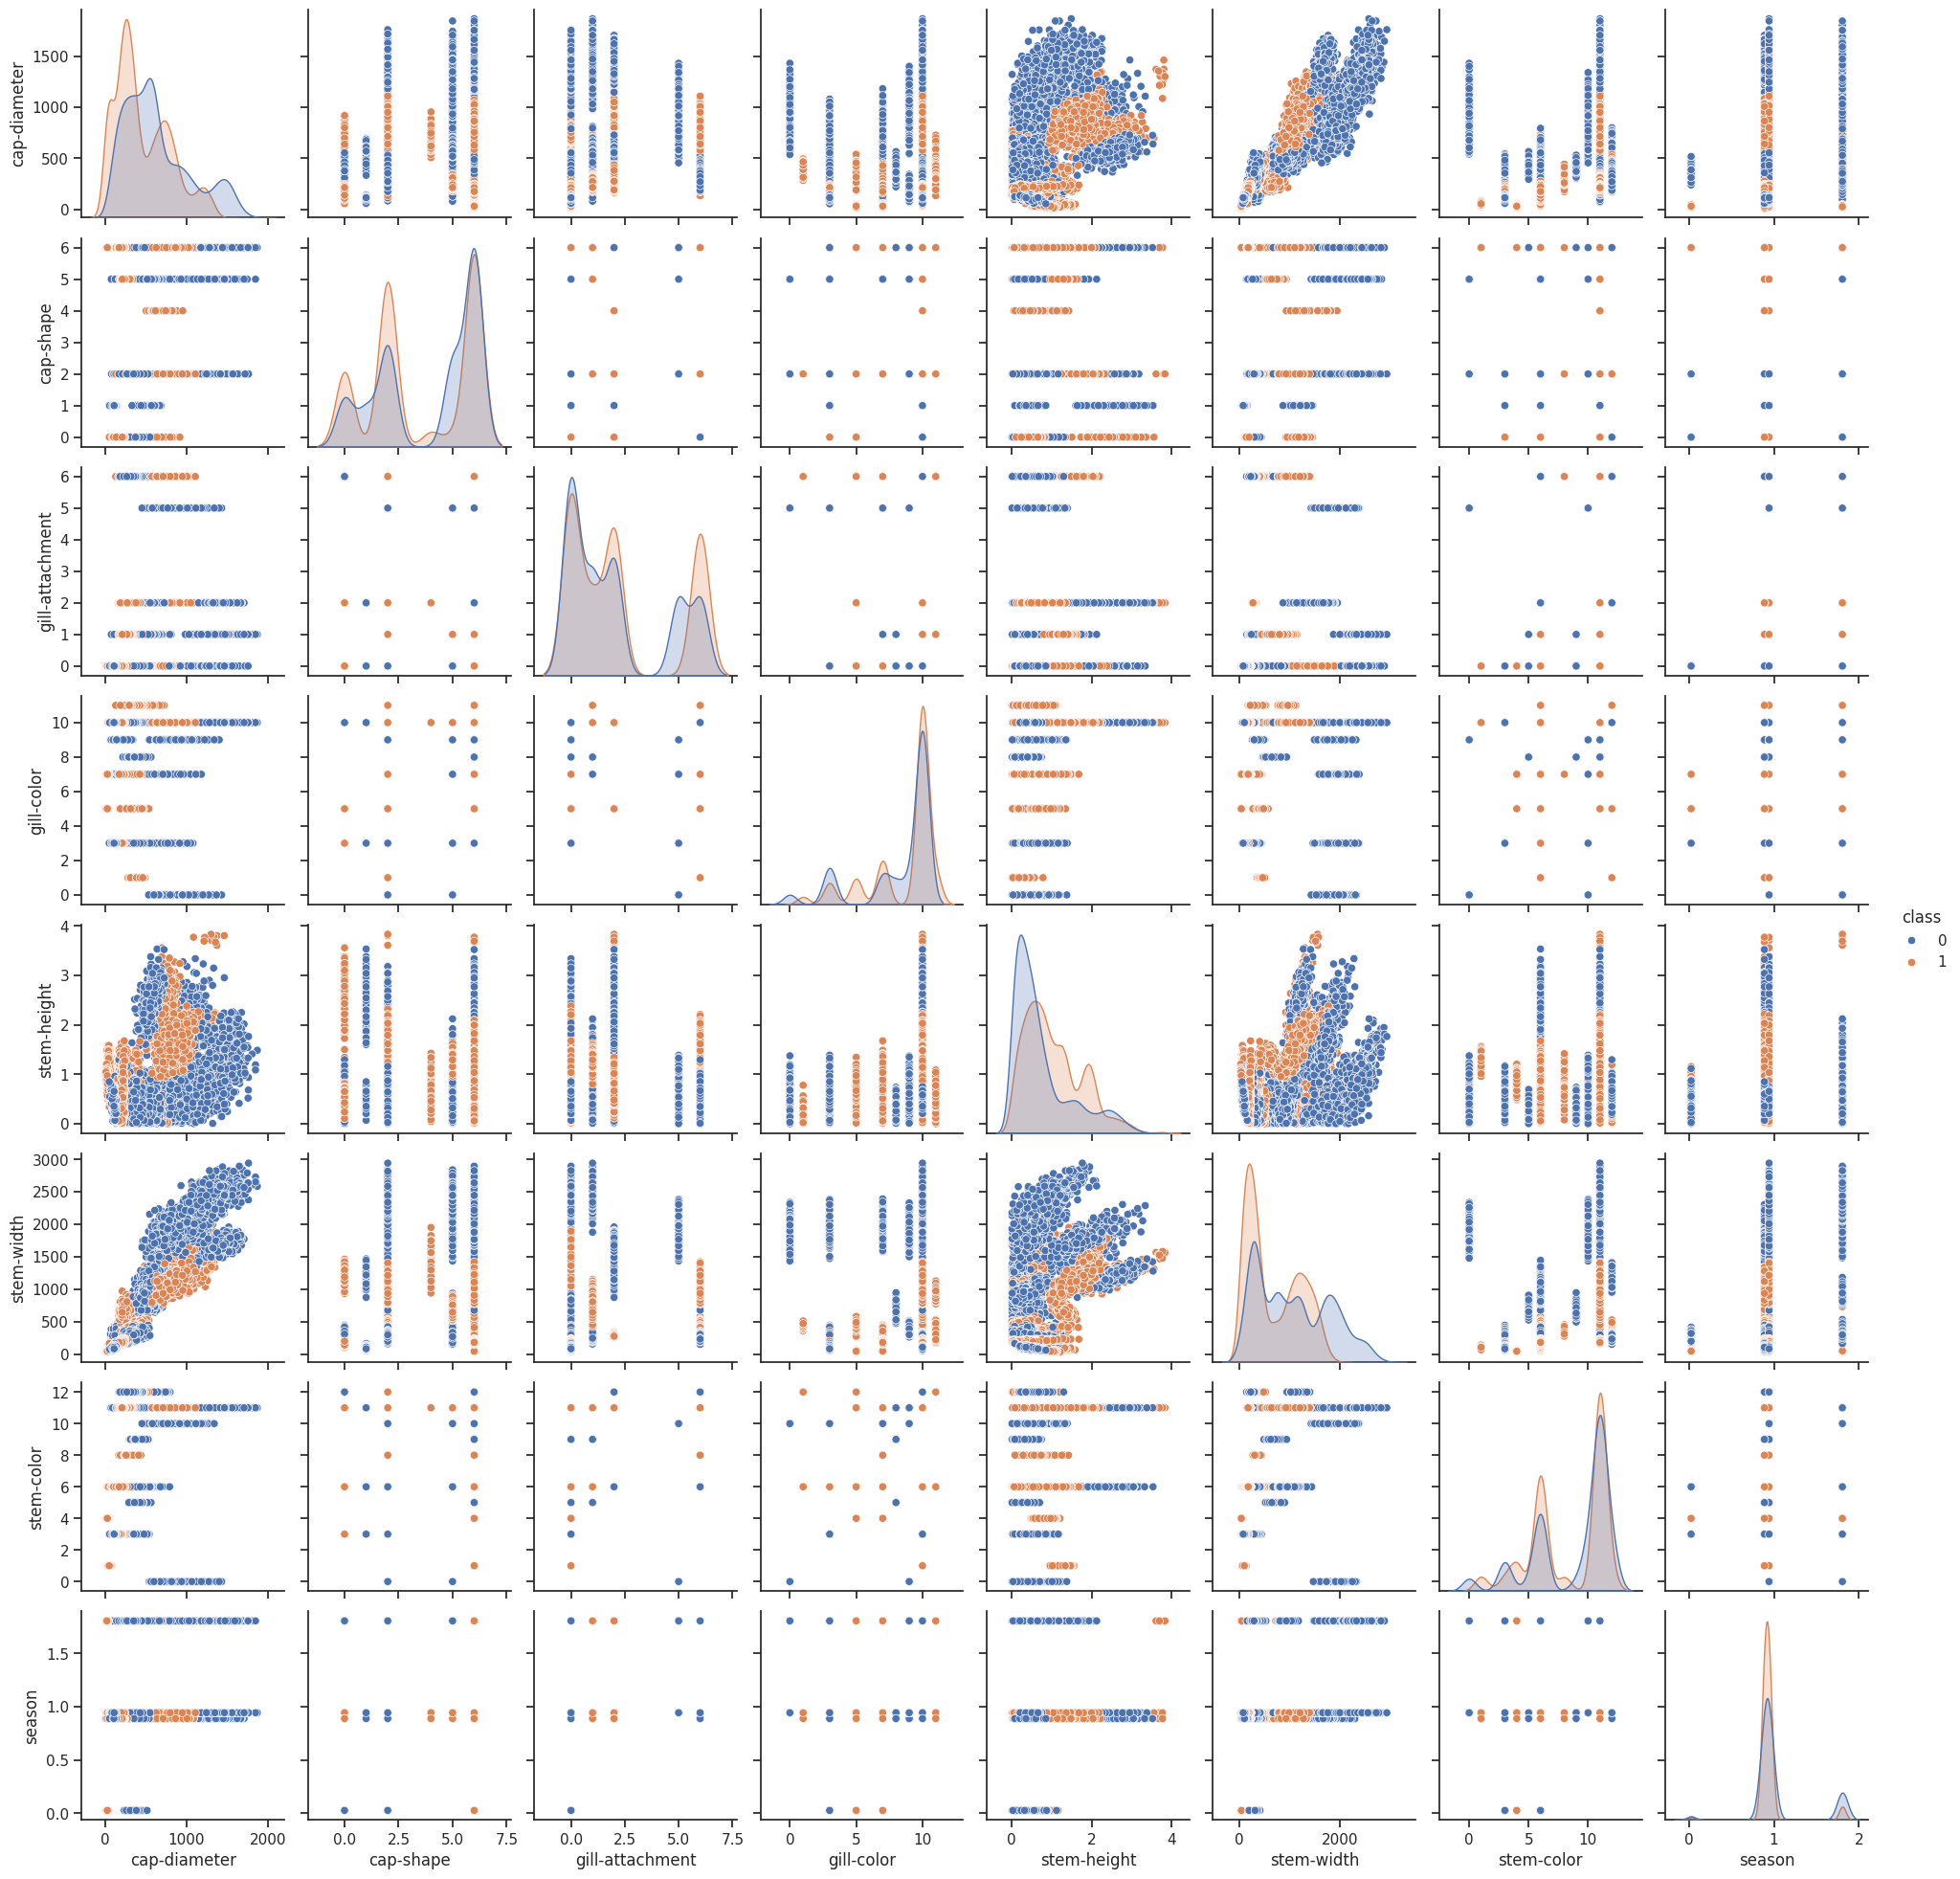

In [124]:
sns.pairplot(df, hue="class")


In [125]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
df['class'].unique()

array([1, 0])

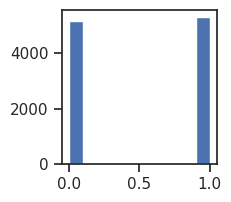

In [126]:
# Оценим дисбаланс для признака class
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(df['class'])
plt.show()

Признак class довольно хорошо сбалансирован

In [127]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

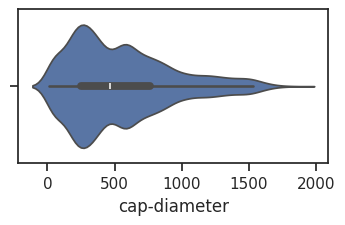

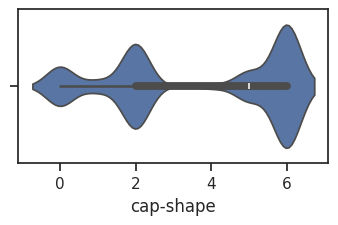

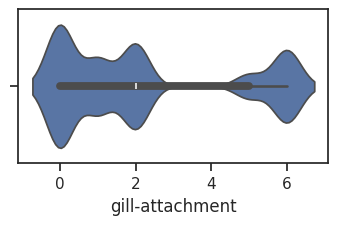

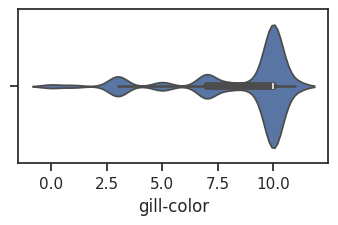

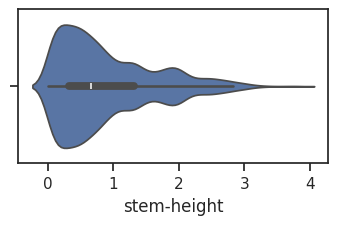

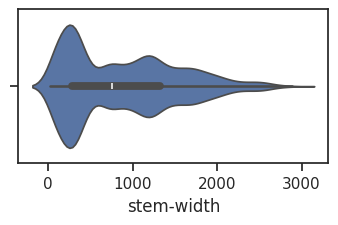

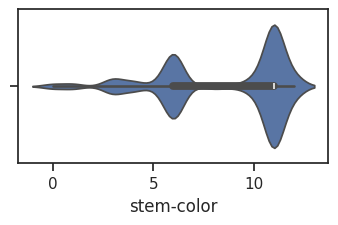

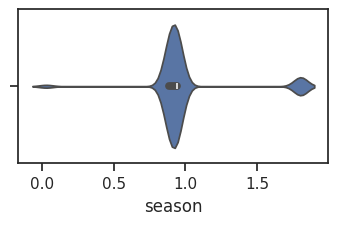

In [128]:
# Скрипичные диаграммы для числовых колонок
for col in ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']:
    plt.figure(figsize=(4, 2))
    sns.violinplot(x=df[col])
    plt.show()

### Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [129]:
df.dtypes


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

Для построения модели можем использовать все признаки, тк они числовые

Категориальные признаки кодировать не требуется

Проведем масштабирование данных

In [130]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [131]:
# колонки для масштабирования
scale_cols = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[scale_cols])
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    df[new_col_name] = sc1_data[:,i]

In [132]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class,cap-diameter_scaled,cap-shape_scaled,gill-attachment_scaled,gill-color_scaled,stem-height_scaled,stem-width_scaled,stem-color_scaled,season_scaled
0,1372,2,2,10,3.807467,1545,11,1.804273,1,0.733980,0.333333,0.333333,0.909091,0.992737,0.521739,0.916667,1.000000
1,1461,2,2,10,3.807467,1557,11,1.804273,1,0.781906,0.333333,0.333333,0.909091,0.992737,0.525847,0.916667,1.000000
2,1371,2,2,10,3.612496,1566,11,1.804273,1,0.733441,0.333333,0.333333,0.909091,0.941896,0.528928,0.916667,1.000000
3,1261,6,2,10,3.787572,1566,11,1.804273,1,0.674206,1.000000,0.333333,0.909091,0.987549,0.528928,0.916667,1.000000
4,1305,6,2,10,3.711971,1464,11,0.943195,1,0.697900,1.000000,0.333333,0.909091,0.967835,0.494009,0.916667,0.515404


Проверим, что масштабирование не повлияло на распределение данных

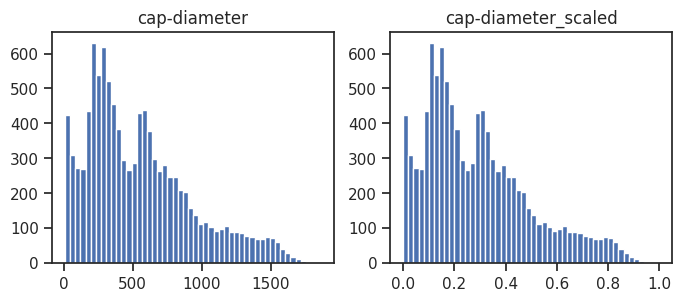

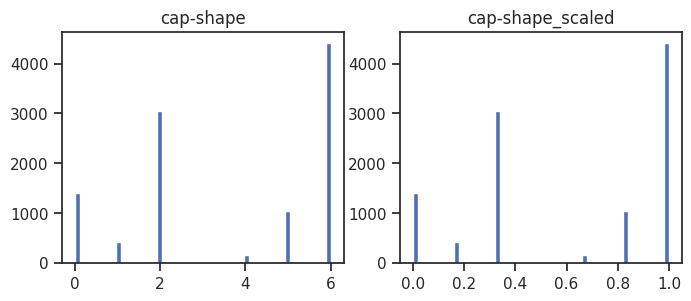

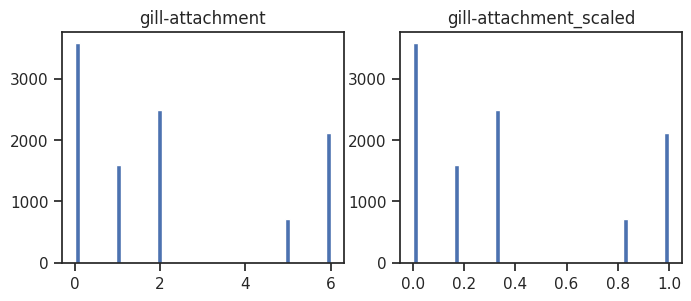

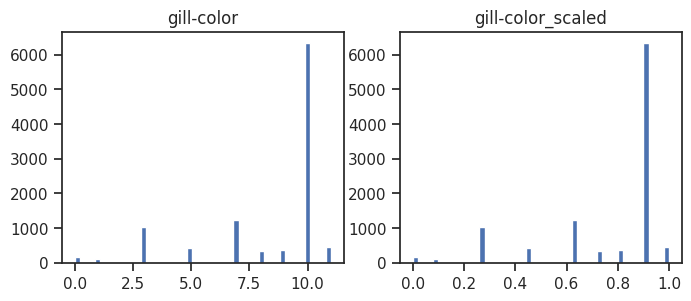

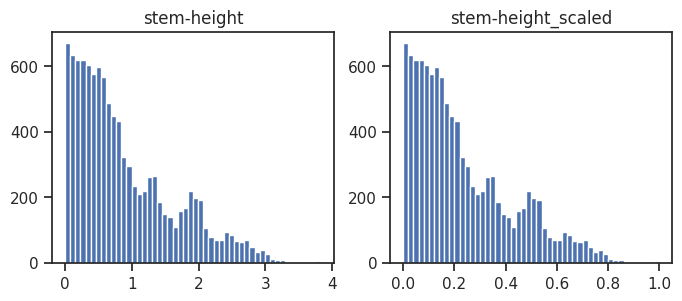

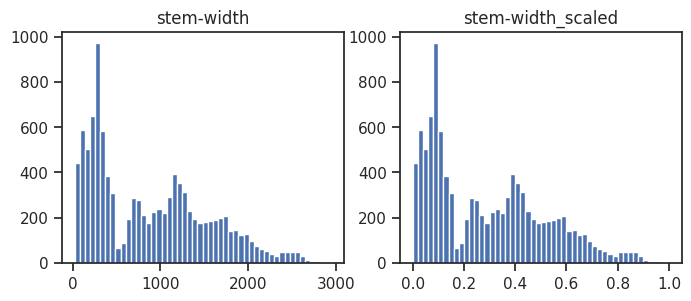

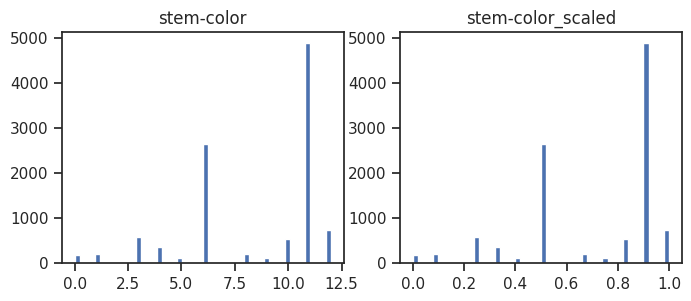

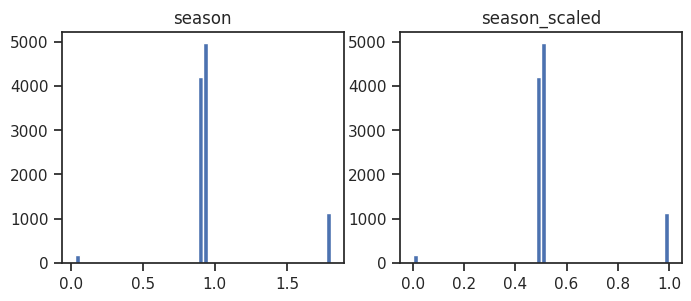

In [133]:
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(df[col], 50)
    ax[1].hist(df[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

### Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [134]:
corr_cols_1 = scale_cols + ['class']
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['class']
corr_cols_2

['cap-diameter_scaled',
 'cap-shape_scaled',
 'gill-attachment_scaled',
 'gill-color_scaled',
 'stem-height_scaled',
 'stem-width_scaled',
 'stem-color_scaled',
 'season_scaled',
 'class']

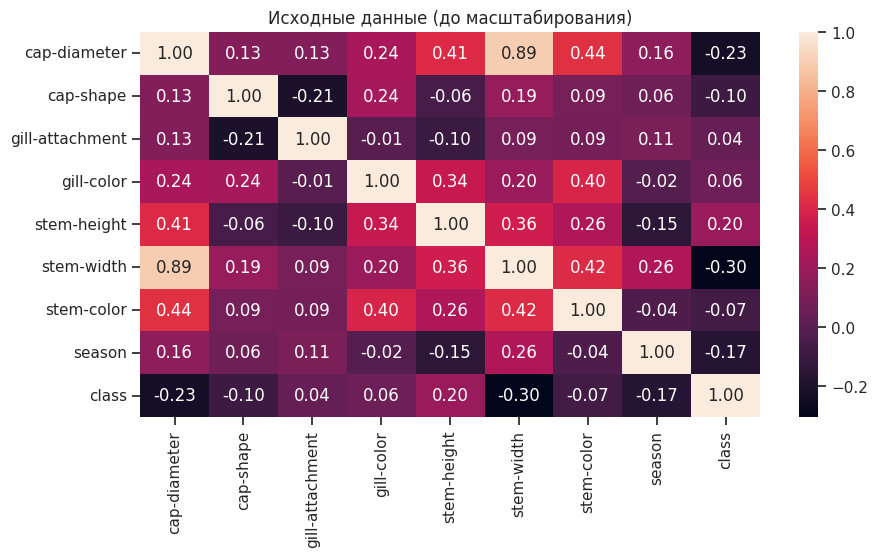

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()


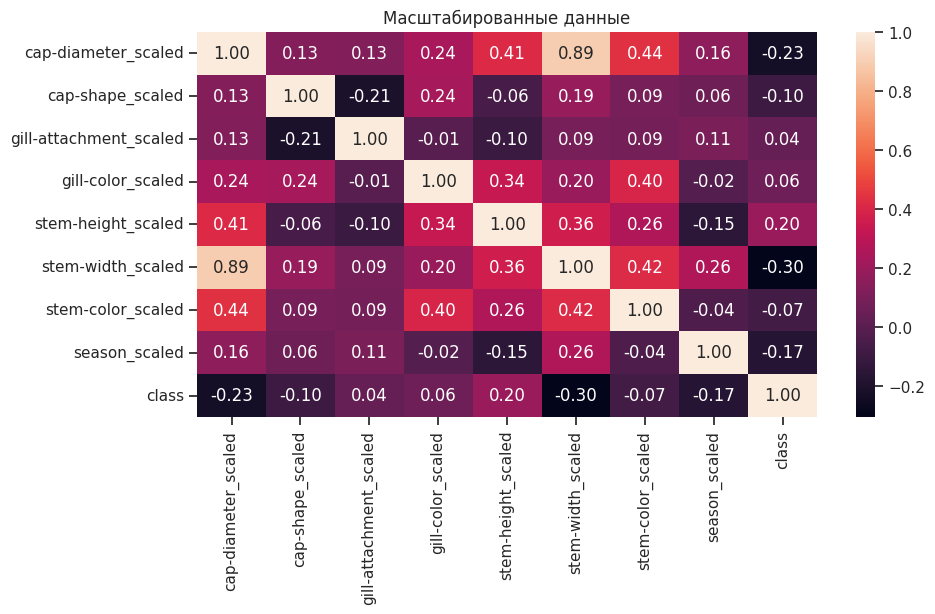

In [136]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак class наиболее сильно коррелирует с признаком stem-height - высота ножки (0.2)
- Целевой признак class наиболее сильно обратно коррелирует с признаками cap_diameter - диаметр шляпки (-0,23) и stem-width - ширина ножки (-0,3)
- На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

### Выбор метрик для последующей оценки качества моделей.


В качестве метрик для решения задачи классификации будем использовать:

- Полнота (recall)

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Пскольку за положительный (1) объект считается ядовитый гриб, то очень важно определить все ядовитые грибы. При этом не будет страшно, если модель по случайности определит съедобный гриб, как ядовитый.

Используется функция recall_score

- F-мера

Для того, чтобы объединить precision и recall в единую метрику используется F-мера, которая вычисляется как среднее гармоническое от precision и recall.  
Причем будем брать случай F-меры с beta=2 чтобы поставить в приоритет метрику recall (по причине, описанной выше)

- ROC AUC

Основана на вычислении следующих характеристик:

True Positive Rate, откладывается по оси ординат. Совпадает с recall.

False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Для получения ROC AUC используется функция roc_auc_score.


### Выбор наиболее подходящих моделей для решения задачи классификации

Для задачи классификации будем использовать следующие модели:

- Логистическая регрессия
- Метод ближайших соседей
- Решающее дерево
- Случайный лес
- Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [137]:
# Признаки для задачи классификации
task_clas_cols = ['cap-diameter_scaled', 'cap-shape_scaled', 'gill-attachment_scaled', 'gill-color_scaled', 'stem-height_scaled', 'stem-width_scaled', 'stem-color_scaled']

In [138]:
# Разделение всего датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df[task_clas_cols], df['class'], test_size=0.2, random_state=42)

In [139]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8384, 7), (2096, 7), (8384,), (2096,))

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

Решение задачи классификации


In [140]:
# Модели
clas_models = {'LogR': LogisticRegression(),
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [141]:
class MetricLogger:

    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric'] == metric) & (self.df['alg'] == alg)].index, inplace=True)
        # Добавление нового значения
        temp = pd.DataFrame({'metric': [metric], 'alg': [alg], 'value': [value]})
        self.df = pd.concat([self.df, temp], ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values

    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [142]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [143]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [144]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]

    recall = recall_score(y_test.values, Y_pred)
    fbeta = fbeta_score(y_test.values, Y_pred, beta=2)  # Использование Fβ-меры с beta=2 для максимизации recall
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)

    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('fbeta', model_name, fbeta)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test.values, display_labels=['0','1'], cmap=plt.cm.Blues, normalize='true')
    cm_display.ax_.set_position(ax[1].get_position())
    cm_display.plot(ax=ax[1])
    fig.suptitle(model_name)
    plt.show()


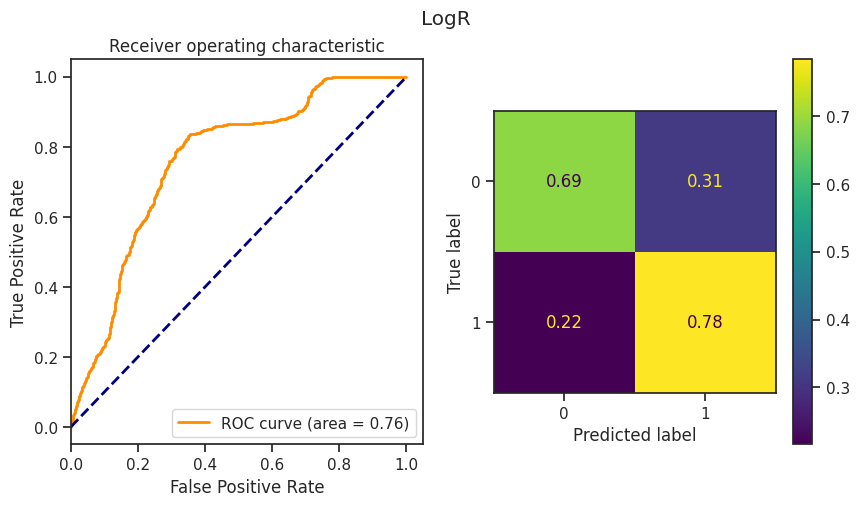

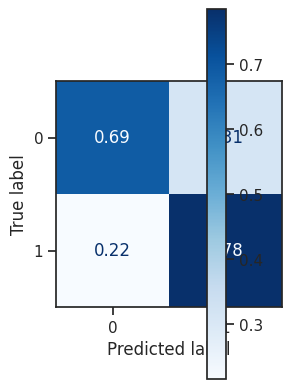

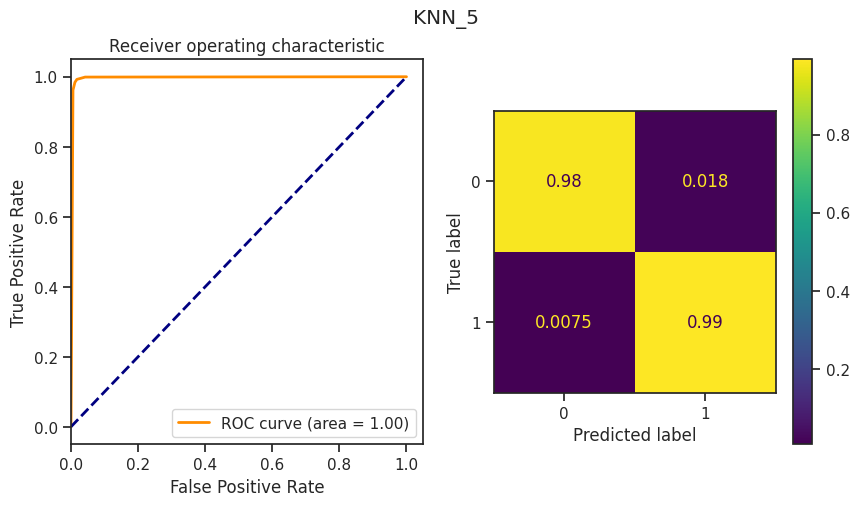

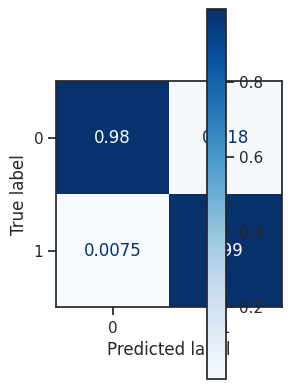

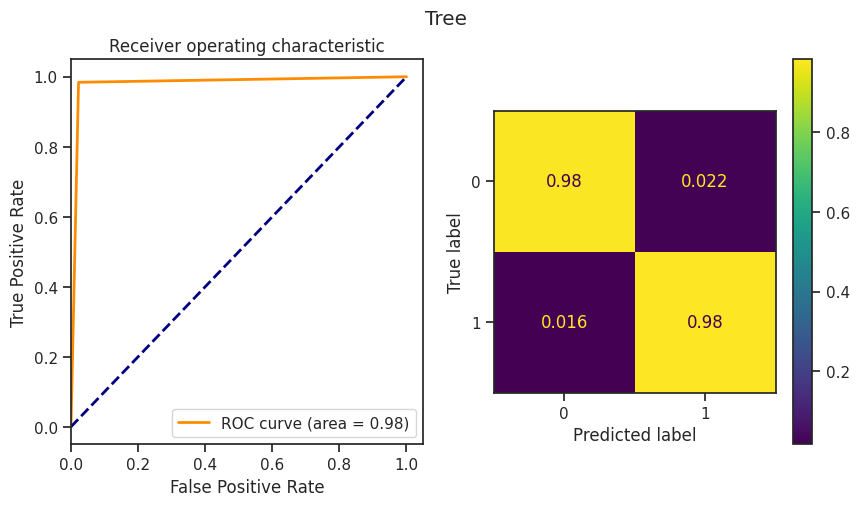

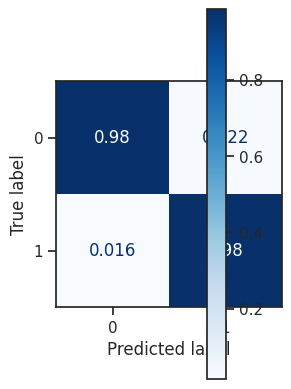

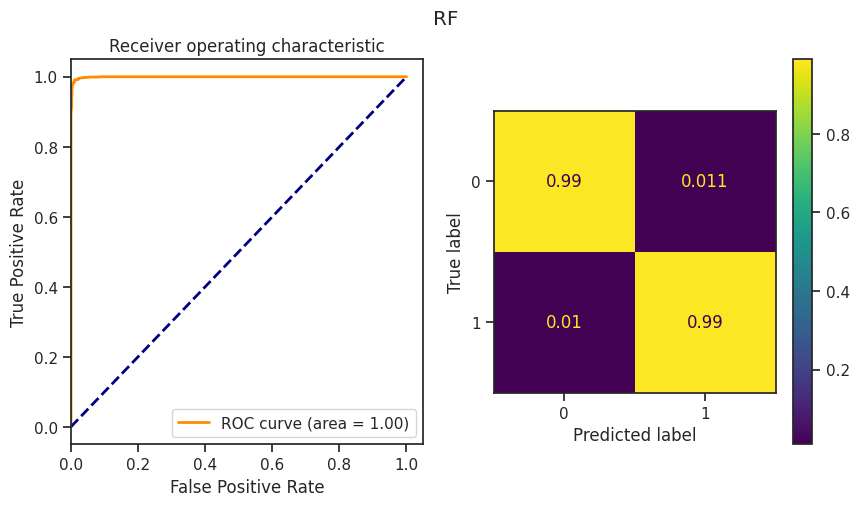

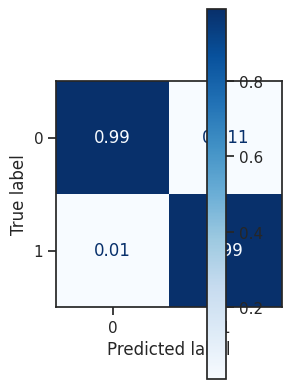

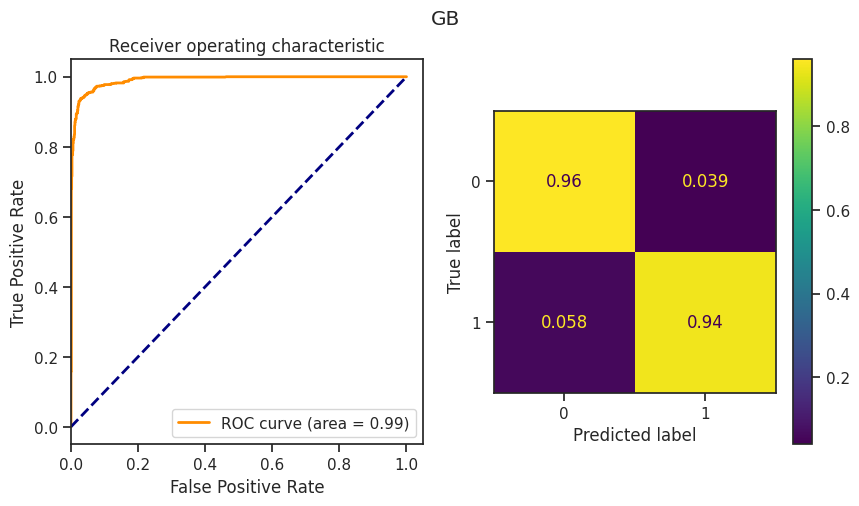

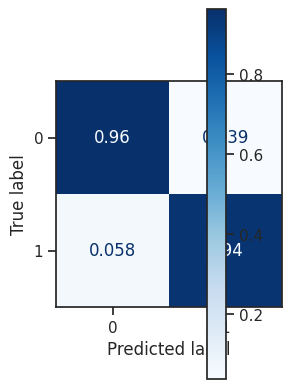

In [145]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

### Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [146]:
n_range_list = list(range(0, 100,2))
n_range_list[0] = 1

In [147]:
n_range = np.array(n_range_list)
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters


[{'n_neighbors': array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
         34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
         68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}]

In [148]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(X_train, y_train)

CPU times: user 13.8 s, sys: 29.1 ms, total: 13.8 s
Wall time: 13.9 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}],
             scoring='roc_auc')

In [149]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=20)

In [150]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 20}

In [151]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'20'

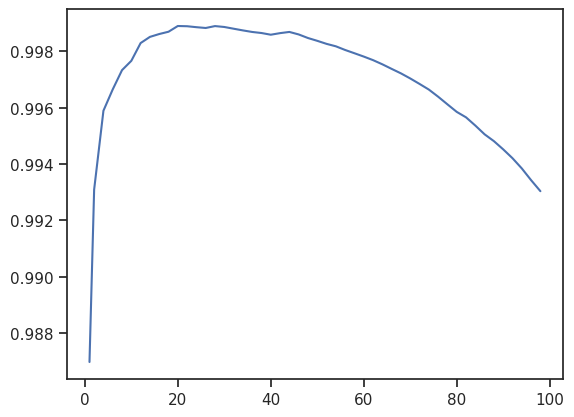

In [152]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

**Вывод:**

Оптимальное значение гиперпараметра - 20

### Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [153]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

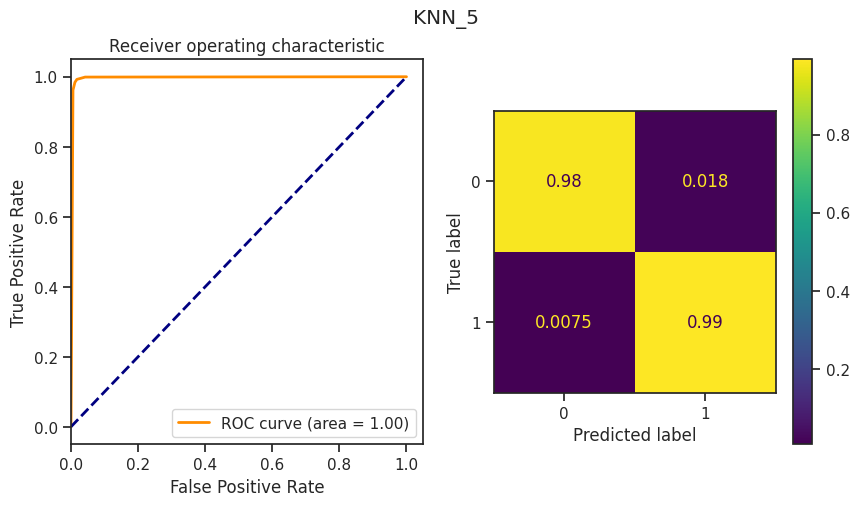

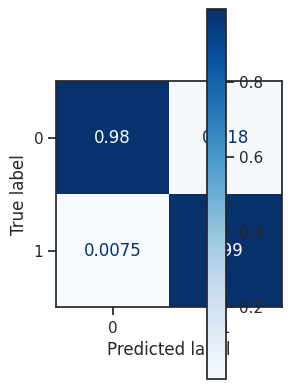

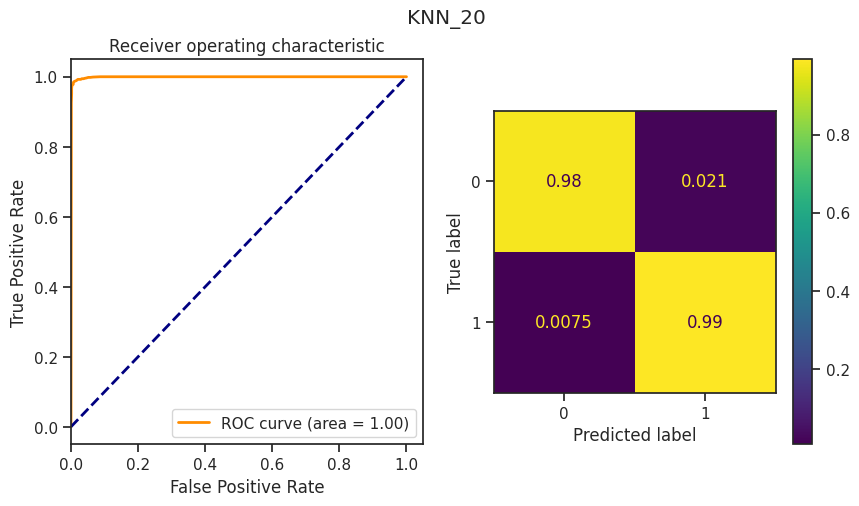

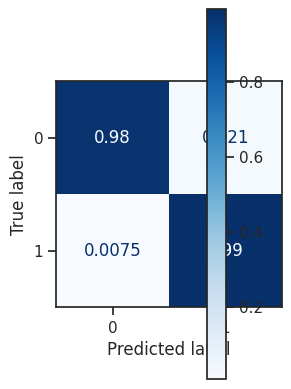

In [154]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

### Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.


In [155]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['recall', 'fbeta', 'roc_auc'], dtype=object)

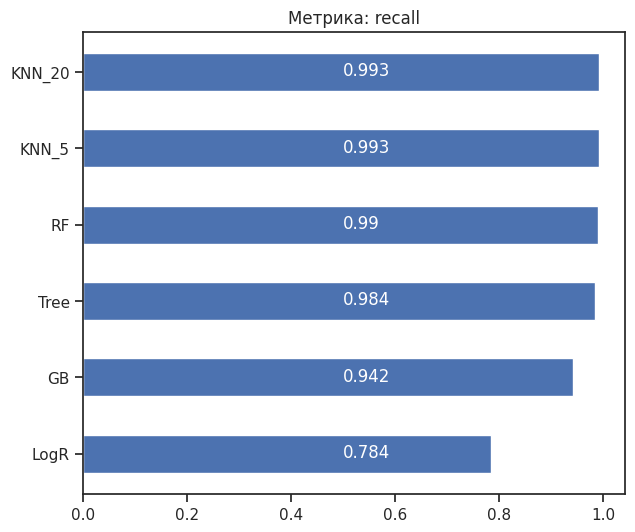

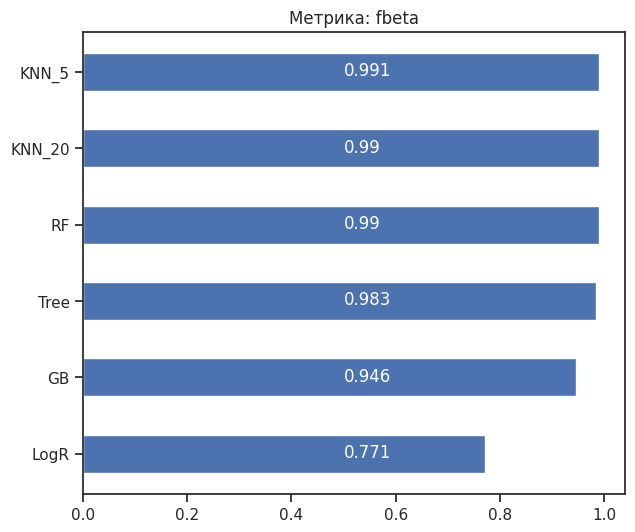

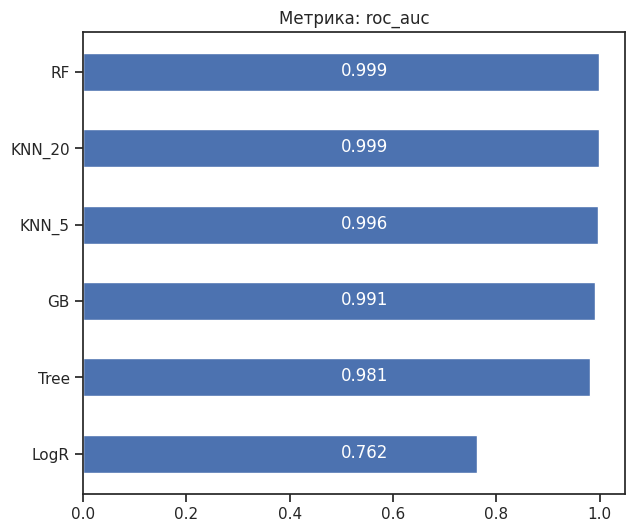

In [156]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

**Вывод:**

2 из 3 метрик вывели, что лучшей оказалась модель случайного леса (Random Forest) и K=20 ближайших соседей.

F (beta=2)метрика показала, что лучшей оказалась модель K=5 ближайших соседей